In [99]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [100]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [101]:
# oracle: make |10001> and |11000> reflect
def oracle (nqubits):
    qc = QuantumCircuit(nqubits)
    qc.cz(4,3) # 1, control, target 
    qc.toffoli(4,0,3) # 2, CCNOT, toffoli
    
    qc.mct([4,3,2,1], 0) # 3-1, CCCCX
    # 3-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0)
    
    qc.mct([4,2,1,0], 3) # 4-1, CCCCX
    # 4-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0)    
    
    qc.mct([4,3,1], 2) # 5, CCCX
    qc.mct([4,3,2,1], 0) # 6-1, CCCCX
    # 6-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0)    

    qc.mct([4,1,0], 3) # 7, CCCX
    qc.mct([4,3,1,0], 2) # 8-1, CCCCX
    # 8-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0) 
    
    qc.mct([4,3,2], 0) # 9, CCCX
    qc.mct([4,3,2,0], 1) # 10-1, CCCCX
    # 10-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0) 
    
    qc.mct([4,2,0], 1) # 11, CCCX
    qc.mct([4,2,1,0], 3) # 12-1, CCCCX
    # 12-2, CCCCZ
    qc.h(0)
    qc.mct([4,3,2,1], 0)
    qc.h(0) 

    U_w = qc.to_gate()
    U_w.name = "U$_\omega$"
    return U_w 

In [102]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)

    for qubit in range(nqubits):
        qc.h(qubit)

    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) 
    qc.h(nqubits-1)

    for qubit in range(nqubits):
        qc.x(qubit)

    for qubit in range(nqubits):
        qc.h(qubit)

    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

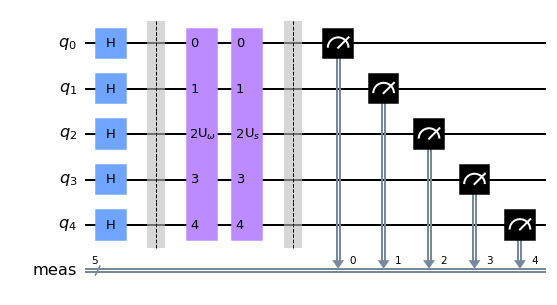

In [103]:
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3,4])
grover_circuit.barrier()
grover_circuit.append(oracle(n), [0,1,2,3,4])
grover_circuit.append(diffuser(n), [0,1,2,3,4])

grover_circuit.measure_all()
grover_circuit.draw()

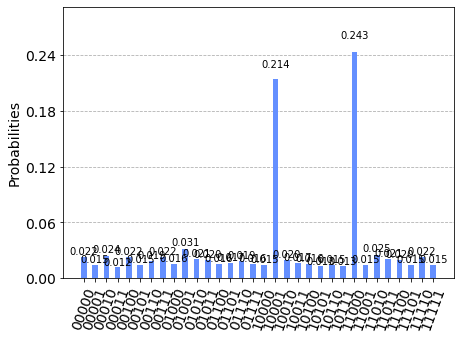

In [104]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

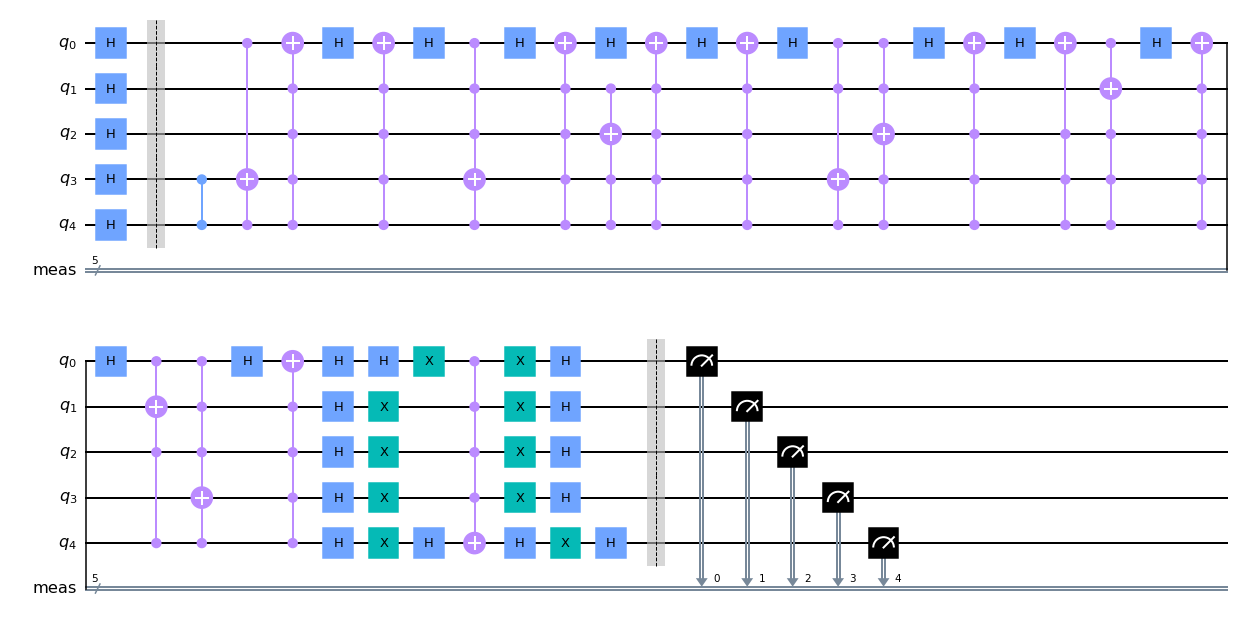

In [105]:
# unroll the function to take a screenshot of the circuit
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3,4])
grover_circuit.barrier()

# grover_circuit.append(oracle(n), [0,1,2,3,4])
grover_circuit.cz(4,3) # 1, control, target 
grover_circuit.toffoli(4,0,3) # 2, CCNOT, toffoli

grover_circuit.mct([4,3,2,1], 0) # 3-1, CCCCX
# 3-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0)

grover_circuit.mct([4,2,1,0], 3) # 4-1, CCCCX
# 4-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0)    

grover_circuit.mct([4,3,1], 2) # 5, CCCX
grover_circuit.mct([4,3,2,1], 0) # 6-1, CCCCX
# 6-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0)    

grover_circuit.mct([4,1,0], 3) # 7, CCCX
grover_circuit.mct([4,3,1,0], 2) # 8-1, CCCCX
# 8-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0) 

grover_circuit.mct([4,3,2], 0) # 9, CCCX
grover_circuit.mct([4,3,2,0], 1) # 10-1, CCCCX
# 10-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0) 

grover_circuit.mct([4,2,0], 1) # 11, CCCX
grover_circuit.mct([4,2,1,0], 3) # 12-1, CCCCX
# 12-2, CCCCZ
grover_circuit.h(0)
grover_circuit.mct([4,3,2,1], 0)
grover_circuit.h(0) 


# grover_circuit.append(diffuser(n), [0,1,2,3,4])
for qubit in range(n):
    grover_circuit.h(qubit)

for qubit in range(n):
    grover_circuit.x(qubit)

# Do multi-controlled-Z gate
grover_circuit.h(n-1)
grover_circuit.mct(list(range(n-1)), n-1) 
grover_circuit.h(n-1)

for qubit in range(n):
    grover_circuit.x(qubit)

for qubit in range(n):
    grover_circuit.h(qubit)

grover_circuit.measure_all()
grover_circuit.draw()

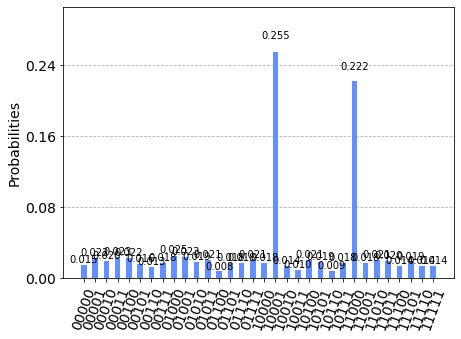

In [106]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)